## Goal: Develop Convolution Neural Network (CNN)from Scratch

In [177]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

#### - import necessary libraries

In [25]:
import os
import cv2 
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras import preprocessing 

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers

from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Give in the path of your Parent folder containing all subfolder with images eg . '/content/drive/MyDrive/Images_PCA_Pasilla'
train_path = './Fingers'

#### - test and validation split

In [27]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2) 

train_batches = train_datagen.flow_from_directory(directory=train_path, \
target_size=(224,224), classes=['0', '1','2', '3'], batch_size=1106,subset='training')

validation_batches = train_datagen.flow_from_directory(directory=train_path, \
target_size=(224,224), classes=['0', '1','2', '3'], batch_size=64,subset='validation')


Found 1106 images belonging to 4 classes.
Found 274 images belonging to 4 classes.


In [21]:
classes=['0', '1','2', '3']

In [40]:
# load in all images at once
xtrain, ytrain = next(train_batches)
xtrain.shape, ytrain.shape

((1106, 224, 224, 3), (1106, 4))

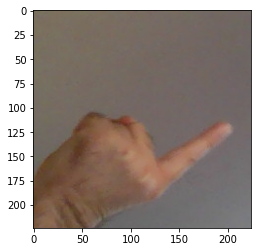

In [41]:
plt.imshow(xtrain[0],cmap='gray')

In [180]:
from tensorflow.keras import backend as K
K.clear_session()
model = Sequential([
    # first conv and max pool layer
    Conv2D(filters=6,kernel_size=(3,3),strides=(1,1),padding='same',activation = 'relu',input_shape= (224, 224, 3)),
    MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'),
    
    # second conv and max pool layer
    Conv2D(filters=16,kernel_size=(4,4),strides=(1,1),padding='same',activation = 'relu'),
    MaxPooling2D(pool_size=(4,4),strides=(2,2),padding='same'),
    
    # third conv and max pool layer
    Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),padding='same',activation = 'relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'),
    
    #Dropout(0.5),
    Flatten(),
    
    Dense(256,activation='relu'),
    #Dropout(0.2),
    Dense(128,activation='relu'),
    #Dropout(0.2),
    Dense(4,activation='softmax') # you could keep only this dense layer and remove the other dense layers
])

In [181]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1552      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 16)        6416      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 16)       0

### 2. Compile the model
- optimizer: adam
- loss: categorical_crossentropy
- metrics = accuracy

In [113]:
from tensorflow.keras.optimizers import Adam

In [182]:
#compile the model
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [183]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

### 3. Fit the model
- epochs = 50 
- batch size = 64

In [184]:
#fit the model
history = model.fit(xtrain,ytrain,batch_size=64,epochs=50,validation_split=0.2, callbacks=[callback])

Epoch 1/50


2022-03-10 23:54:21.554960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 1.4290 - accuracy: 0.2274

2022-03-10 23:54:26.558939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 6s 337ms/step - loss: 1.4290 - accuracy: 0.2274 - val_loss: 1.3839 - val_accuracy: 0.2703
Epoch 2/50
14/14 [==============================] - 5s 323ms/step - loss: 1.3858 - accuracy: 0.2760 - val_loss: 1.3800 - val_accuracy: 0.2883
Epoch 3/50
14/14 [==============================] - 4s 261ms/step - loss: 1.3493 - accuracy: 0.3416 - val_loss: 1.2967 - val_accuracy: 0.3378
Epoch 4/50
14/14 [==============================] - 4s 276ms/step - loss: 1.2793 - accuracy: 0.4265 - val_loss: 1.3146 - val_accuracy: 0.4054
Epoch 5/50
14/14 [==============================] - 4s 315ms/step - loss: 1.2102 - accuracy: 0.5102 - val_loss: 1.2664 - val_accuracy: 0.4414
Epoch 6/50
14/14 [==============================] - 4s 286ms/step - loss: 1.0061 - accuracy: 0.5792 - val_loss: 1.0282 - val_accuracy: 0.5766
Epoch 7/50
14/14 [==============================] - 4s 305ms/step - loss: 0.7793 - accuracy: 0.6765 - val_loss: 0.8127 - val_accuracy: 0.6532
Epoch 8/50
14/14 

In [71]:
history.history

{'loss': [1.6534465551376343,
  1.371363639831543,
  1.297283411026001,
  1.0871150493621826,
  0.8619308471679688,
  0.6950215101242065,
  0.5754633545875549,
  0.3753063678741455,
  0.2343691736459732,
  0.15931850671768188,
  0.09419117122888565,
  0.05692452937364578,
  0.04020712524652481,
  0.02744433283805847,
  0.02319655939936638,
  0.01571500673890114,
  0.008748356252908707,
  0.006248601712286472,
  0.005015491042286158,
  0.004285083152353764],
 'accuracy': [0.23190046846866608,
  0.33484163880348206,
  0.4298642575740814,
  0.5927602052688599,
  0.6662896275520325,
  0.7398190498352051,
  0.7907240390777588,
  0.8812217712402344,
  0.942307710647583,
  0.966063380241394,
  0.9807692766189575,
  0.9932126998901367,
  0.9943439364433289,
  0.9988688230514526,
  0.9977375864982605,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.4244989156723022,
  1.3466734886169434,
  1.2609026432037354,
  1.4208242893218994,
  1.0639662742614746,
  1.0280929803848267,
  0.898901879787

Text(0, 0.5, 'accuracy')

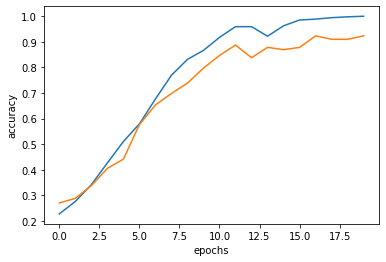

In [185]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

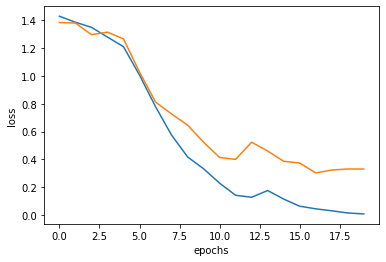

In [186]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

#### Load image

In [132]:
!pip install imageio

In [135]:
pwd

'/Users/dilaraarif/Desktop/pca-pasilla-student-code/09_week/project'

In [133]:
import imageio

In [187]:
img = imageio.imread('/Users/dilaraarif/Desktop/pca-pasilla-student-code/09_week/imageclassifier/one_finger/20-54-00-395184.png')

##### Expand dimensions

In [188]:
a = image.img_to_array(img, dtype = 'uint8')
a.shape

(224, 224, 3)

In [189]:
a = np.expand_dims(a, axis=0)
a.shape

(1, 224, 224, 3)

In [190]:
model.predict(a)

2022-03-10 23:56:18.397875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0., 0., 0., 1.]], dtype=float32)

<BarContainer object of 4 artists>

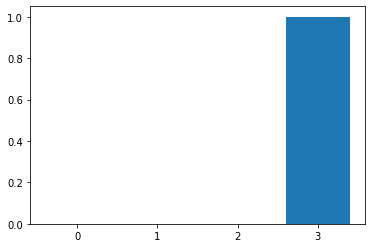

In [191]:
plt.bar(x = classes, height = model.predict(a)[0])

In [192]:
test_path_1 = '/Users/dilaraarif/Desktop/pca-pasilla-student-code/09_week/imageclassifier'

In [193]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0) 

test_batches = test_datagen.flow_from_directory(directory=test_path_1, \
target_size=(224,224), classes=['one_finger'], batch_size=42)

Found 42 images belonging to 1 classes.


In [194]:
model.predict(test_batches)

2022-03-10 23:56:38.024788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[6.48829575e-23, 5.26282415e-17, 3.03720543e-03, 9.96962726e-01],
       [3.42829165e-21, 5.23852524e-15, 4.95851680e-04, 9.99504089e-01],
       [3.07849492e-17, 4.27943957e-15, 5.39165698e-02, 9.46083486e-01],
       [4.23098383e-17, 5.24938426e-12, 1.30707724e-02, 9.86929178e-01],
       [2.48311249e-14, 5.07189234e-13, 2.12901481e-03, 9.97870922e-01],
       [4.22392567e-16, 3.69952029e-12, 8.73947799e-01, 1.26052245e-01],
       [1.77605111e-24, 8.97476990e-21, 6.12810906e-03, 9.93871927e-01],
       [7.50037418e-18, 8.51876413e-20, 2.89606483e-04, 9.99710441e-01],
       [3.23265291e-23, 9.70750216e-18, 4.82933642e-03, 9.95170653e-01],
       [1.19985826e-18, 1.77941407e-12, 4.30618646e-03, 9.95693862e-01],
       [8.91327310e-24, 1.90839821e-19, 4.06234205e-04, 9.99593794e-01],
       [4.23655414e-19, 1.16603932e-15, 4.21180855e-04, 9.99578774e-01],
       [5.20053298e-21, 9.82301793e-17, 2.97429902e-03, 9.97025669e-01],
       [6.50628493e-22, 3.12461534e-16, 6.89791748e

<BarContainer object of 4 artists>

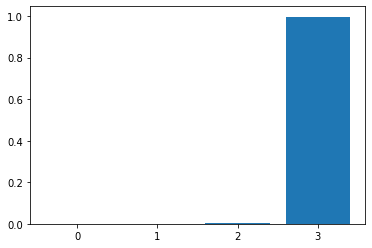

In [198]:
plt.bar(x = classes, height = model.predict(test_batches)[2])

In [196]:
model.save('fingers.h5')